In [246]:
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt

<b> Assignment 2 : </b> Implement frequency domain filtering for image smoothening and sharpening using ideal and Butterworth filtering.

Compare the result with inbuilt functions if present.

Analyse and comment on the results

<h1> Frequency Domain Filtering </h1>

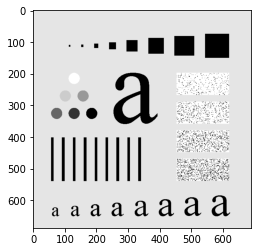

In [247]:
#sample image for smoothing
image = Image.open("DIP3E_Original_Images_CH04/Fig0441(a)(characters_test_pattern).tif")
ar = np.asarray(image)
plt.imshow(image, cmap="gray")

In [248]:
#Padding with size : 2 x 2 wrt the original image
def pad(image) :
    P = image.shape[0]
    Q = image.shape[1]
    res = np.zeros((2 * P, 2 * Q))
    for i in range(P) :
        for j in range(Q) :
            res[i][j] = image[i][j]
    return res

The following is an algorithm to implement frequency domain filtering. It takes as input the image and filter and returns the filtered image.

In [249]:
def generic_algorithm(image, H) :
    img = np.asarray(image)
    #apply padding
    padded_image = pad(img)
    dft = np.fft.fftshift(np.fft.fft2(padded_image))
    prod = dft * H
    idft = np.fft.ifft2(np.fft.ifftshift(prod))
    return idft

In [250]:
#creating distance array
P = 2 * ar.shape[0]
Q = 2 * ar.shape[1]
D = np.zeros((P, Q))
for i in range(P) :
    for j in range(Q) : 
        D[i][j] = math.sqrt(((i - P // 2) ** 2) + ((j - Q // 2) ** 2))

<h2> Smoothening Filters (Lowpass Filters)</h2>

Output of low pass filter only allow low frequencies to pass through, the high frequencies contents such as noises are blocked which make processed image has less noisy pixels. Therefore, low pass filter is highly used to remove the noises in images.

<h3> Ideal Lowpass Filter </h3>

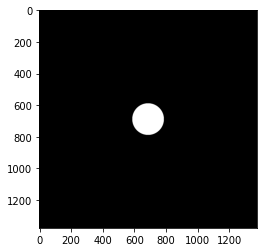

In [251]:
D0 = 100
img = (D <= D0)
plt.imshow(img, cmap = "gray")

In [252]:
imgr = generic_algorithm(image, img)

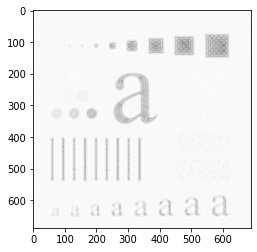

In [253]:
plt.imshow(2 * np.log(np.abs(imgr[:P//2, :Q//2])), cmap="gray")

<h3> Butterworth Smoothing Filter </h3>

In [254]:
P = 2 * ar.shape[0]
Q = 2 * ar.shape[1]
D0 = 200
n = 2
img = np.zeros((P, Q))
for i in range(P) :
    for j in range(Q) : 
        img[i][j] = 1 / (1 + ((D[i][j] / D0) ** (2 * n)))

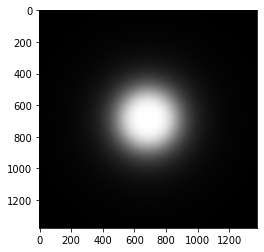

In [255]:
plt.imshow(img, cmap = "gray")

In [256]:
imgr = generic_algorithm(image, img)

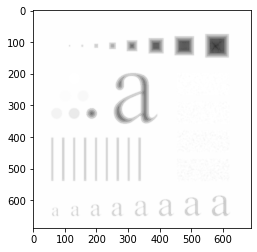

In [257]:
plt.imshow(2 * np.log(np.abs(imgr[:P//2, :Q//2])), cmap="gray")

<h6> Analysis </h6>

Some information will be discontinued sharply without any smoothness. On the contrary, Butterworth is smoothly blocking information that is outside of certain radius from origin point which makes image smoother with less distortion.

A ringing effect is seen in the output of the ideal low pass filter

<h2> Sharpening Filters </h2>

The output from high pass filter captures the edges in image which could be used to sharpen the original image with proper overlap calculation. This will enhance sharpness in original image making edges clearer. 

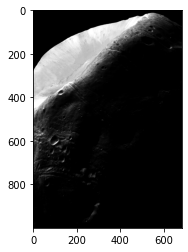

In [258]:
image = Image.open("DIP3E_Original_Images_CH03/Fig0323(a)(mars_moon_phobos).tif")
ar = np.asarray(image)
plt.imshow(image, cmap="gray")

In [259]:
#creating distance array
P = 2 * ar.shape[0]
Q = 2 * ar.shape[1]
D = np.zeros((P, Q))
for i in range(P) :
    for j in range(Q) : 
        D[i][j] = math.sqrt(((i - P // 2) ** 2) + ((j - Q // 2) ** 2))

<h3> Ideal Highpass Filter </h3>

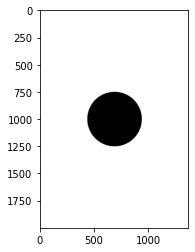

In [260]:
D0 = 250
img = (D > D0)
plt.imshow(img, cmap = "gray")

In [261]:
imgr = generic_algorithm(image, img)

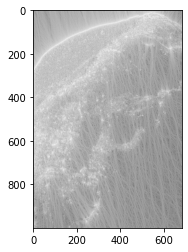

In [262]:
plt.imshow(2 * np.log(np.abs(imgr[:P//2, :Q//2])), cmap="gray")

<h2> Butterworth Filter </h2> 

In [263]:
P = 2 * ar.shape[0]
Q = 2 * ar.shape[1]
D0 = 200
n = 2
img = np.zeros((P, Q))
for i in range(P) :
    for j in range(Q) : 
        img[i][j] = 1 / ((1 + (D0 / D[i][j]) ** (2 * n)))

<ipython-input-263-3588f8585412>:8: RuntimeWarning: divide by zero encountered in double_scalars
  img[i][j] = 1 / ((1 + (D0 / D[i][j]) ** (2 * n)))


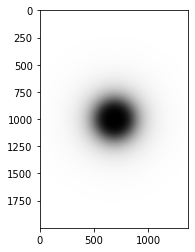

In [264]:
plt.imshow(img, cmap = "gray")

In [265]:
imgr = generic_algorithm(image, img)

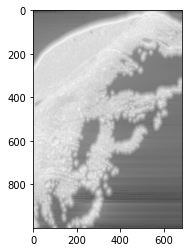

In [266]:
plt.imshow(2 * np.log(np.abs(imgr[:P//2, :Q//2])), cmap="gray")

<h6> Analysis </h6>
There are a lot of distortions in an ideal filter result when compared to a Butterworth filter.